In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

properties_2016 = pd.read_csv("../data/properties_2016.csv")
print('All Property Dataset:', properties_2016.shape)
train_2016 = pd.read_csv("../data/train_2016_v2.csv")
print('Training Properties Dataset:', train_2016.shape)
# should only be training on properties that actually sold
df = train_2016.merge(properties_2016, on='parcelid', how='left')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '../data/properties_2016.csv'

In [ ]:
print(pd.DataFrame({
    'Missing': df.isnull().sum(),
    'Percent': (df.isnull().sum() / len(df) * 100).round(2)
}).sort_values('Missing', ascending=False))

                              Missing  Percent
buildingclasstypeid             90259    99.98
finishedsquarefeet13            90242    99.96
storytypeid                     90232    99.95
basementsqft                    90232    99.95
yardbuildingsqft26              90180    99.89
fireplaceflag                   90053    99.75
architecturalstyletypeid        90014    99.71
typeconstructiontypeid          89976    99.67
finishedsquarefeet6             89854    99.53
decktypeid                      89617    99.27
poolsizesum                     89306    98.93
pooltypeid10                    89114    98.71
pooltypeid2                     89071    98.67
taxdelinquencyyear              88492    98.02
taxdelinquencyflag              88492    98.02
hashottuborspa                  87910    97.38
yardbuildingsqft17              87629    97.07
finishedsquarefeet15            86711    96.05
finishedfloor1squarefeet        83419    92.41
finishedsquarefeet50            83419    92.41
fireplacecnt 

In [ ]:
df.dtypes

parcelid                          int64
logerror                        float64
transactiondate                  object
airconditioningtypeid           float64
architecturalstyletypeid        float64
basementsqft                    float64
bathroomcnt                     float64
bedroomcnt                      float64
buildingclasstypeid             float64
buildingqualitytypeid           float64
calculatedbathnbr               float64
decktypeid                      float64
finishedfloor1squarefeet        float64
calculatedfinishedsquarefeet    float64
finishedsquarefeet12            float64
finishedsquarefeet13            float64
finishedsquarefeet15            float64
finishedsquarefeet50            float64
finishedsquarefeet6             float64
fips                            float64
fireplacecnt                    float64
fullbathcnt                     float64
garagecarcnt                    float64
garagetotalsqft                 float64
hashottuborspa                   object


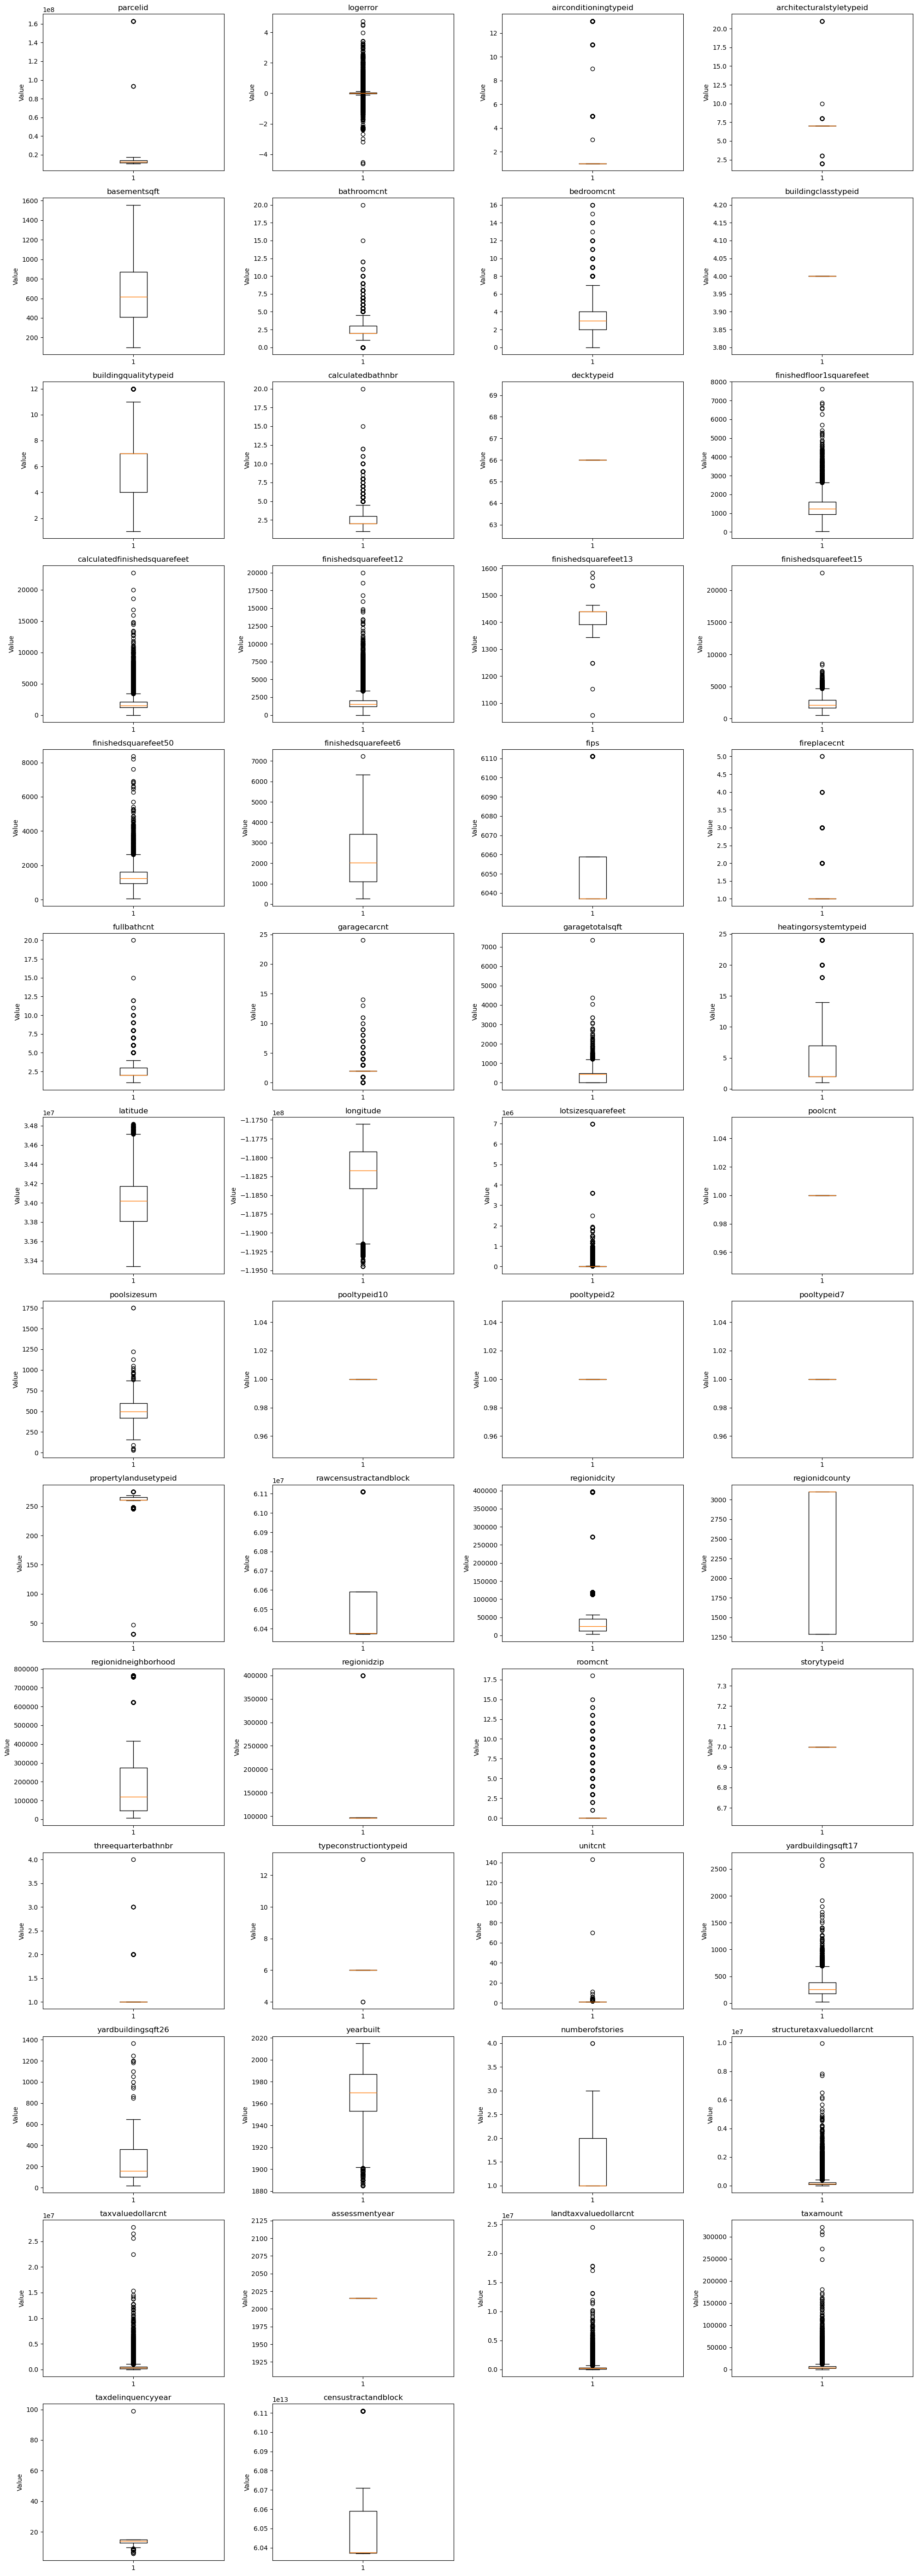

In [ ]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
# study distributions of each feature
n_features = len(numeric_df.columns)
n_cols = 4
n_rows = (n_features + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows*4))
axes = axes.flatten()

for idx, col in enumerate(numeric_df.columns):
    axes[idx].boxplot(numeric_df[col].dropna())
    axes[idx].set_title(col)
    axes[idx].set_ylabel('Value')

for idx in range(len(numeric_df.columns), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()

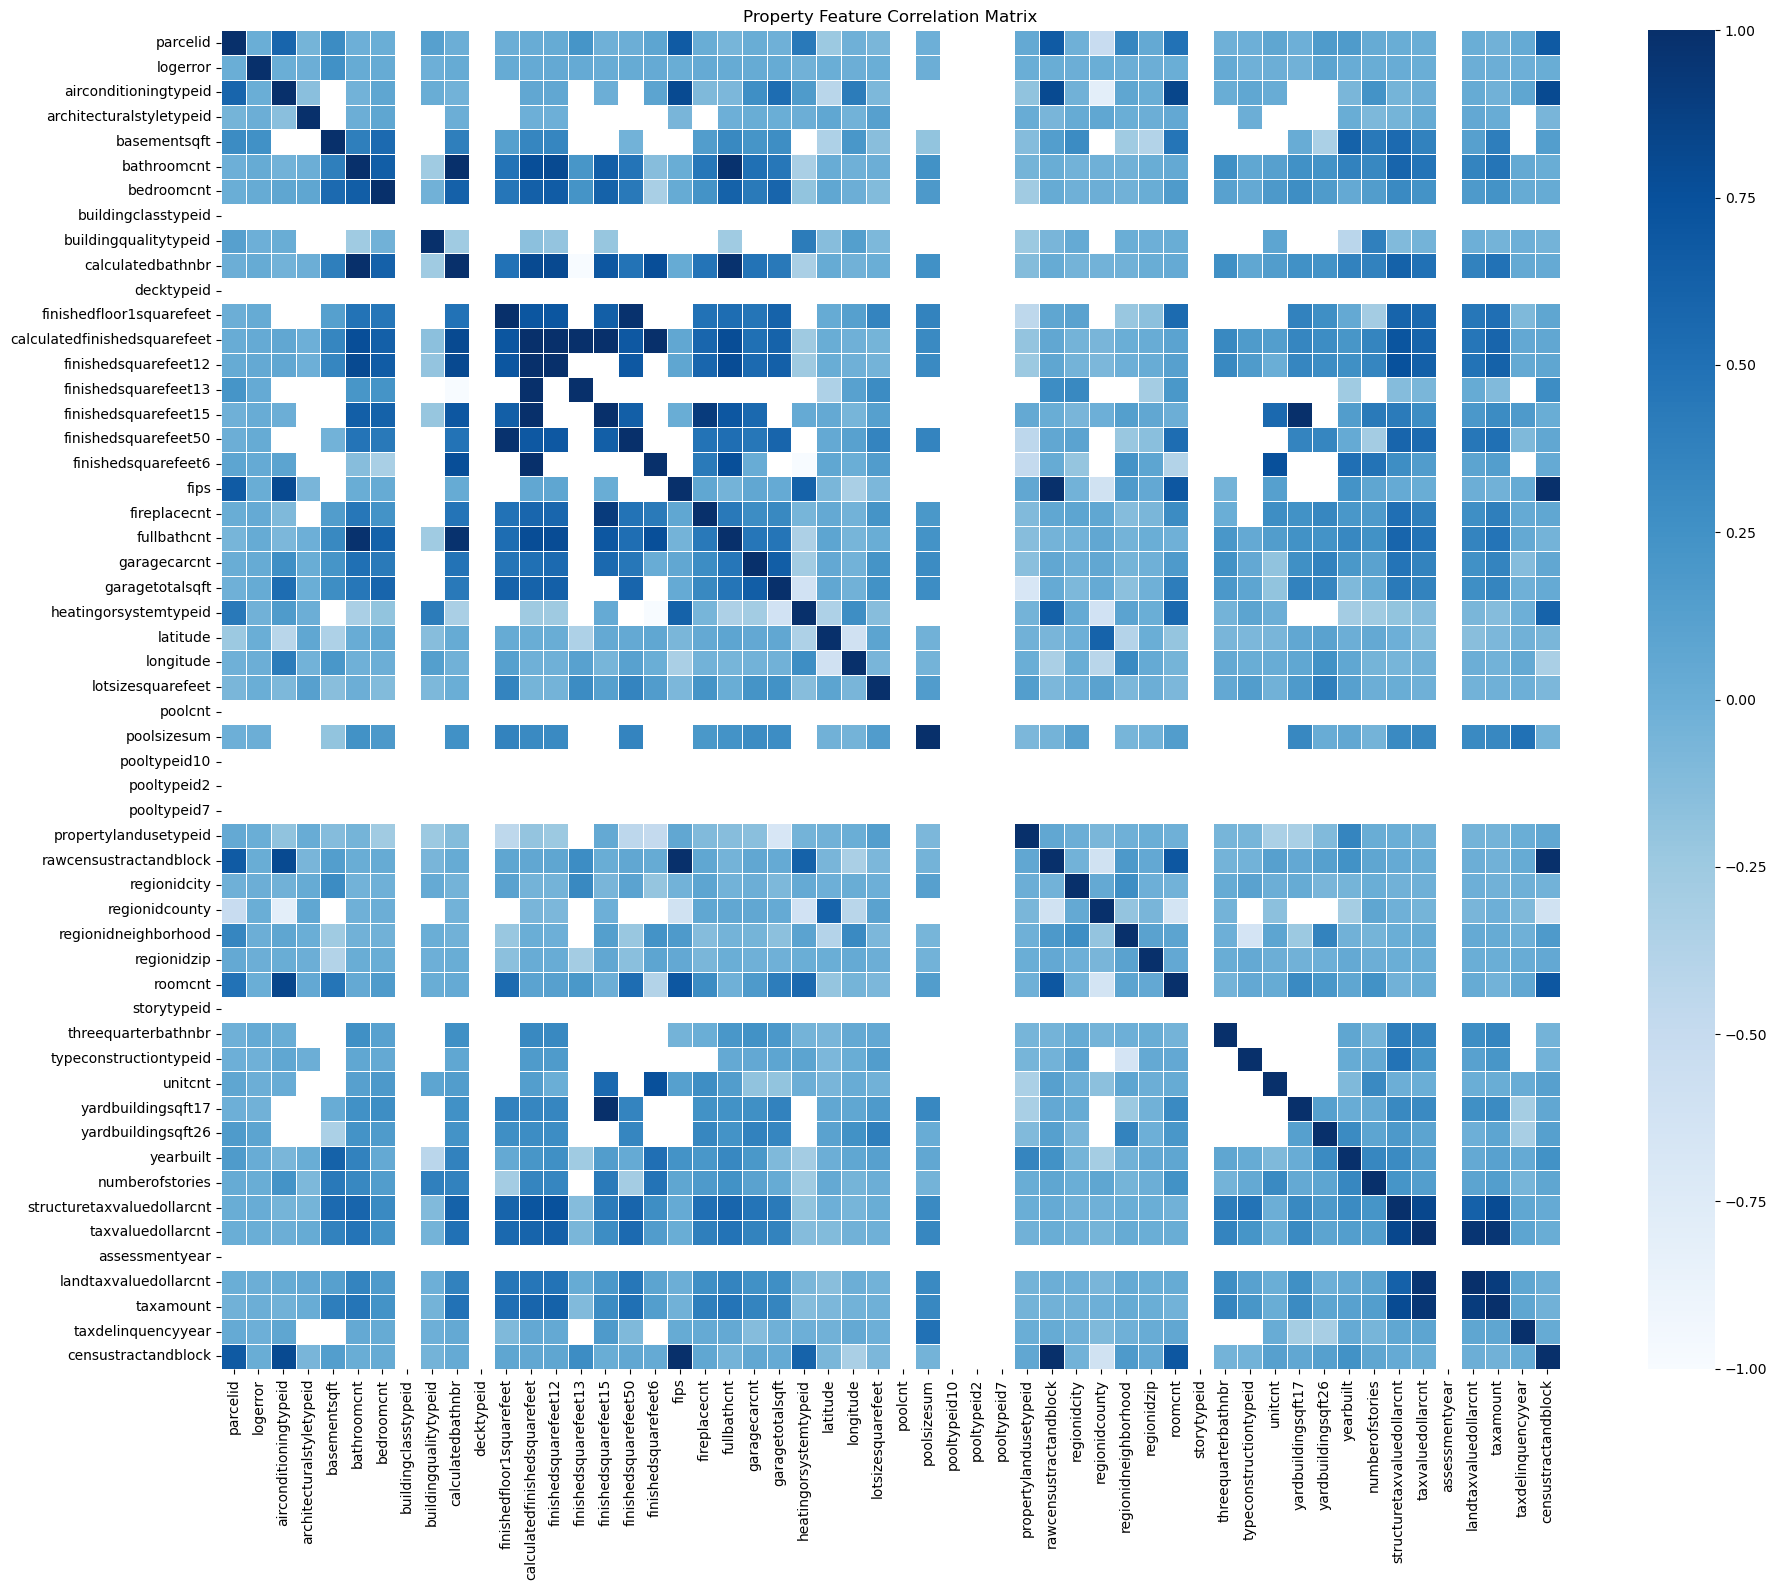

In [ ]:
corr = numeric_df.corr()

# plot heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(corr, annot=False, cmap='Blues', center=0, square=True, linewidths=0.5)
plt.title('Property Feature Correlation Matrix')
plt.tight_layout()
plt.show()

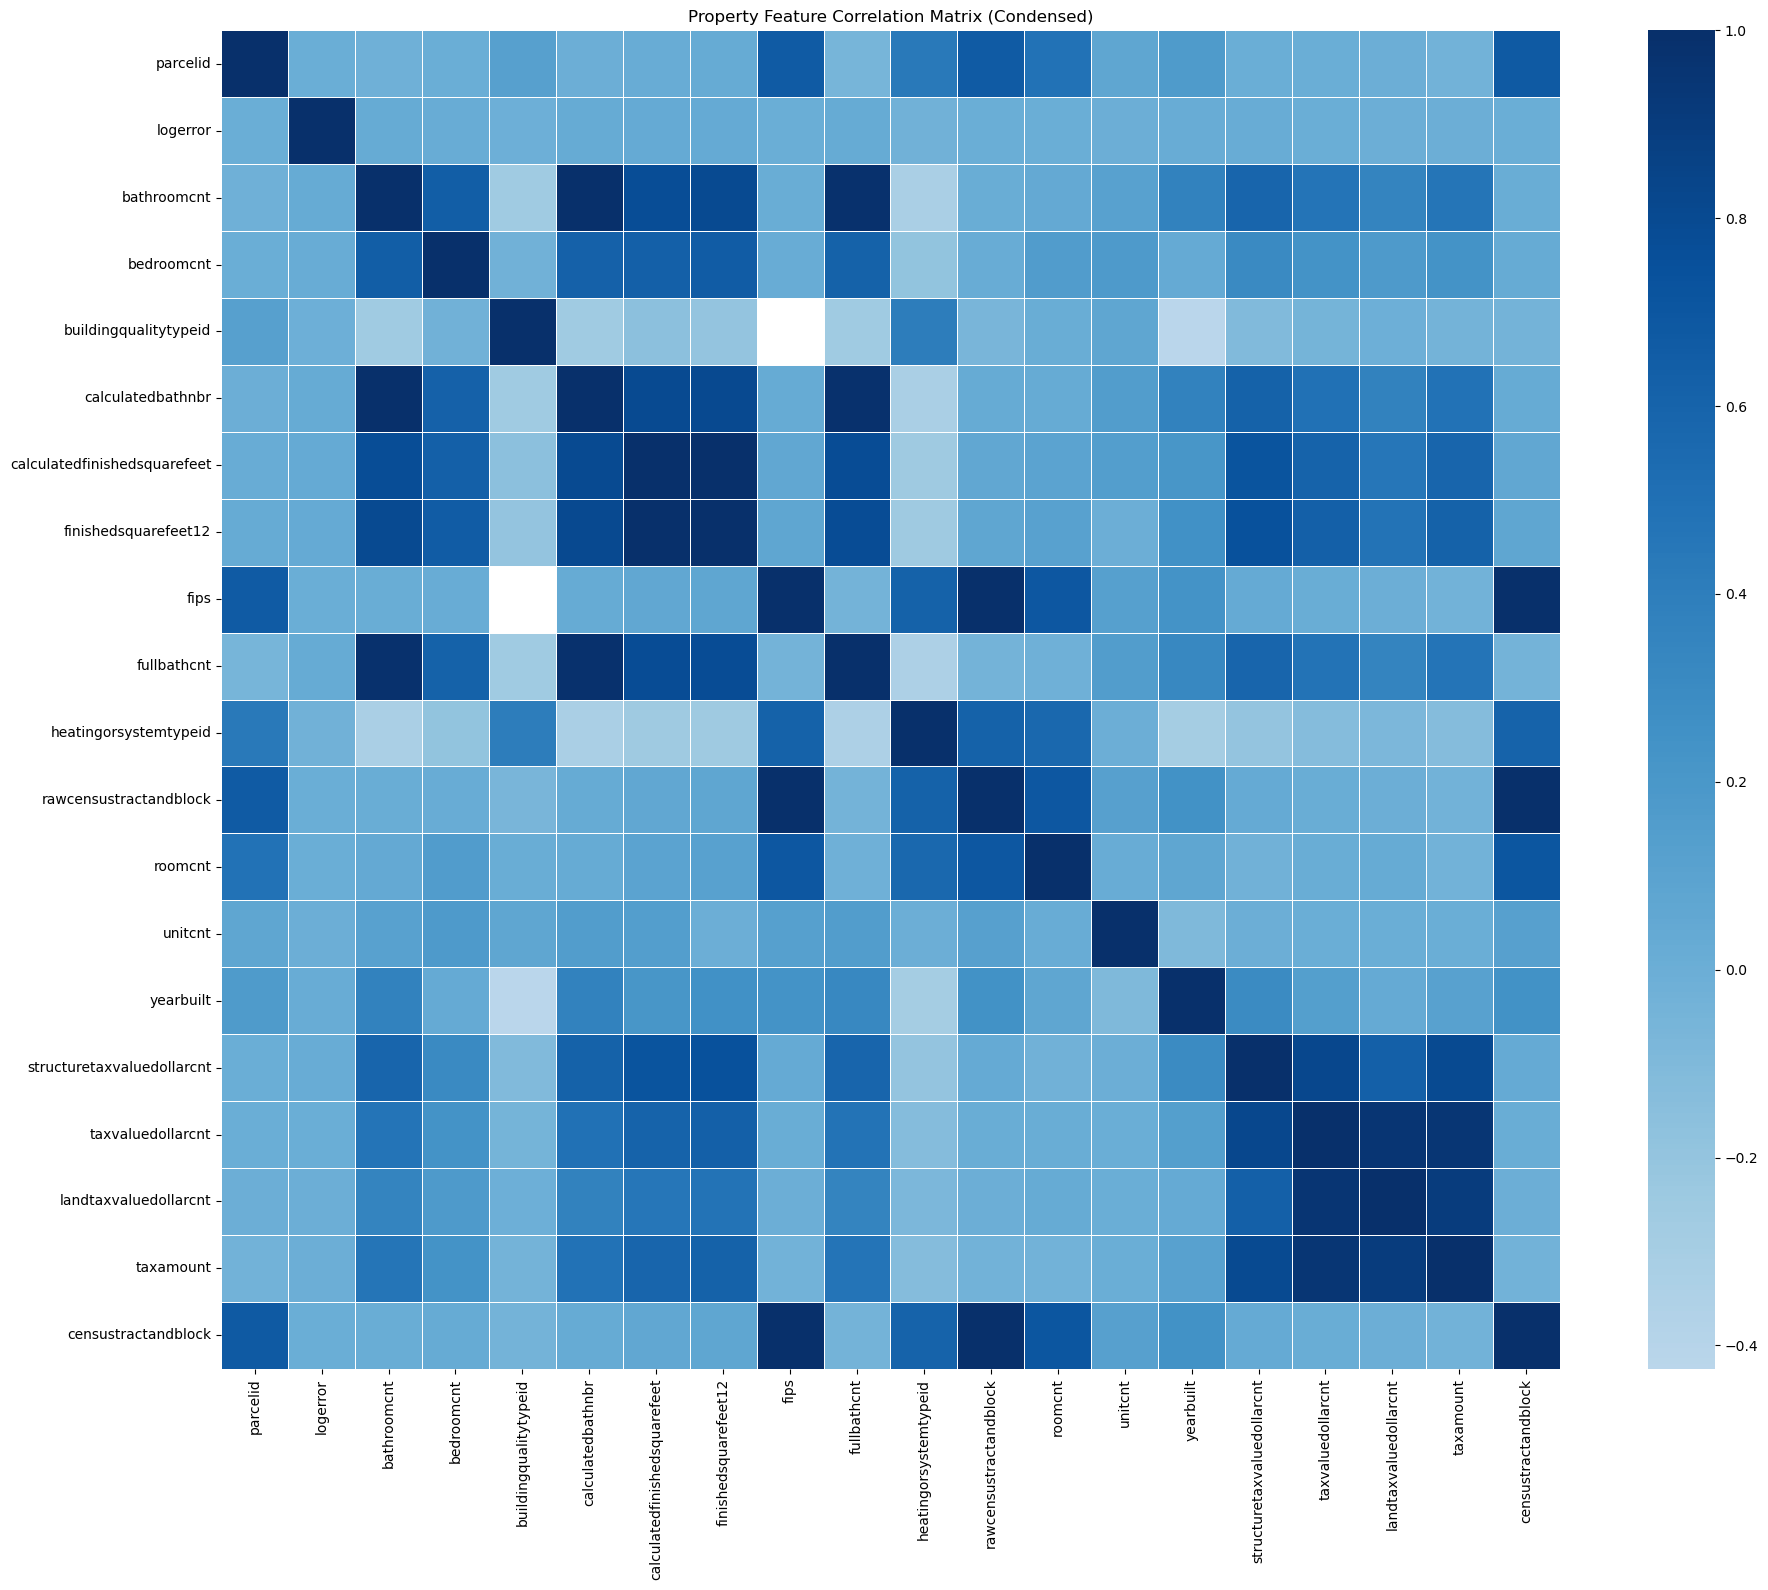

In [ ]:
# manually identify columns to drop that are not highly correlated with other features
numeric_df = numeric_df.drop(columns=['lotsizesquarefeet', 'assessmentyear', 'latitude', 'longitude', 'regionidcity', 'propertylandusetypeid', 'regionidcounty', 'regionidzip'])
missing_pct = numeric_df.isnull().sum() / len(numeric_df)
columns_to_drop = missing_pct[missing_pct > 0.6].index
numeric_df = numeric_df.drop(columns=columns_to_drop)
corr = numeric_df.corr()

# plot heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(corr, annot=False, cmap='Blues', center=0, square=True, linewidths=0.5)
plt.title('Property Feature Correlation Matrix (Condensed)')
plt.tight_layout()
plt.show()

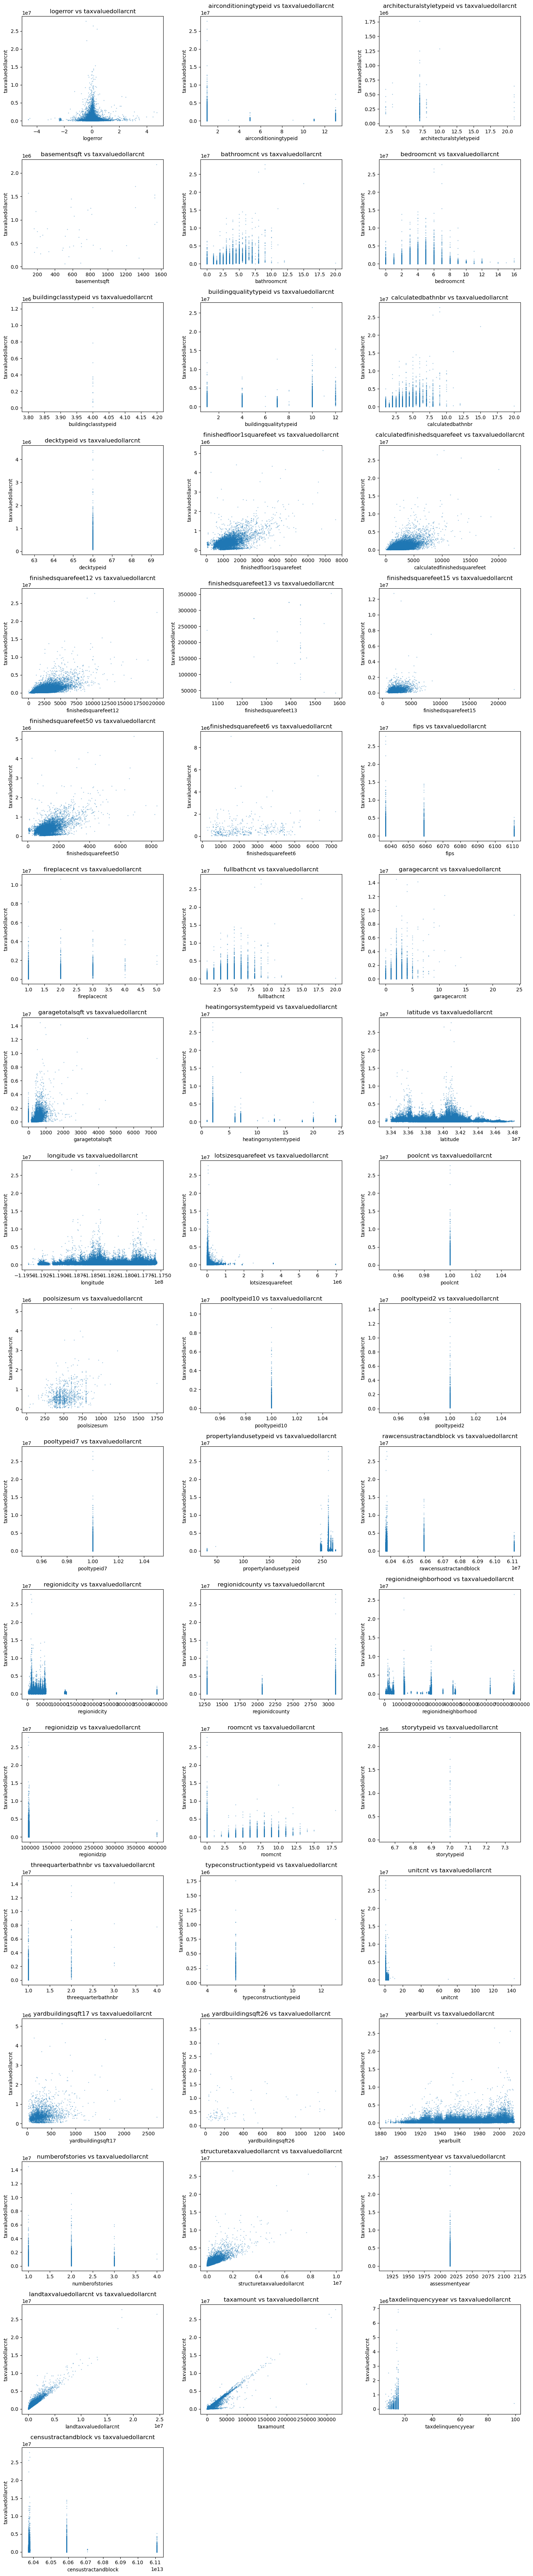

In [ ]:
# identify numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# remove ID columns and columns you don't want to plot against themselves
cols_to_exclude = ['taxvaluedollarcnt', 'parcelid']
numeric_cols = [col for col in numeric_cols if col not in cols_to_exclude]

# subplots
n_cols = 3  # number of columns in the subplot grid
n_rows = int(np.ceil(len(numeric_cols) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
axes = axes.flatten()

# plot each numeric feature against taxvaluedollarcnt to see if relationships are linear or nonlinear
for idx, col in enumerate(numeric_cols):
    axes[idx].scatter(df[col], df['taxvaluedollarcnt'], alpha=0.3, s=1)
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('taxvaluedollarcnt')
    axes[idx].set_title(f'{col} vs taxvaluedollarcnt')
for idx in range(len(numeric_cols), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()

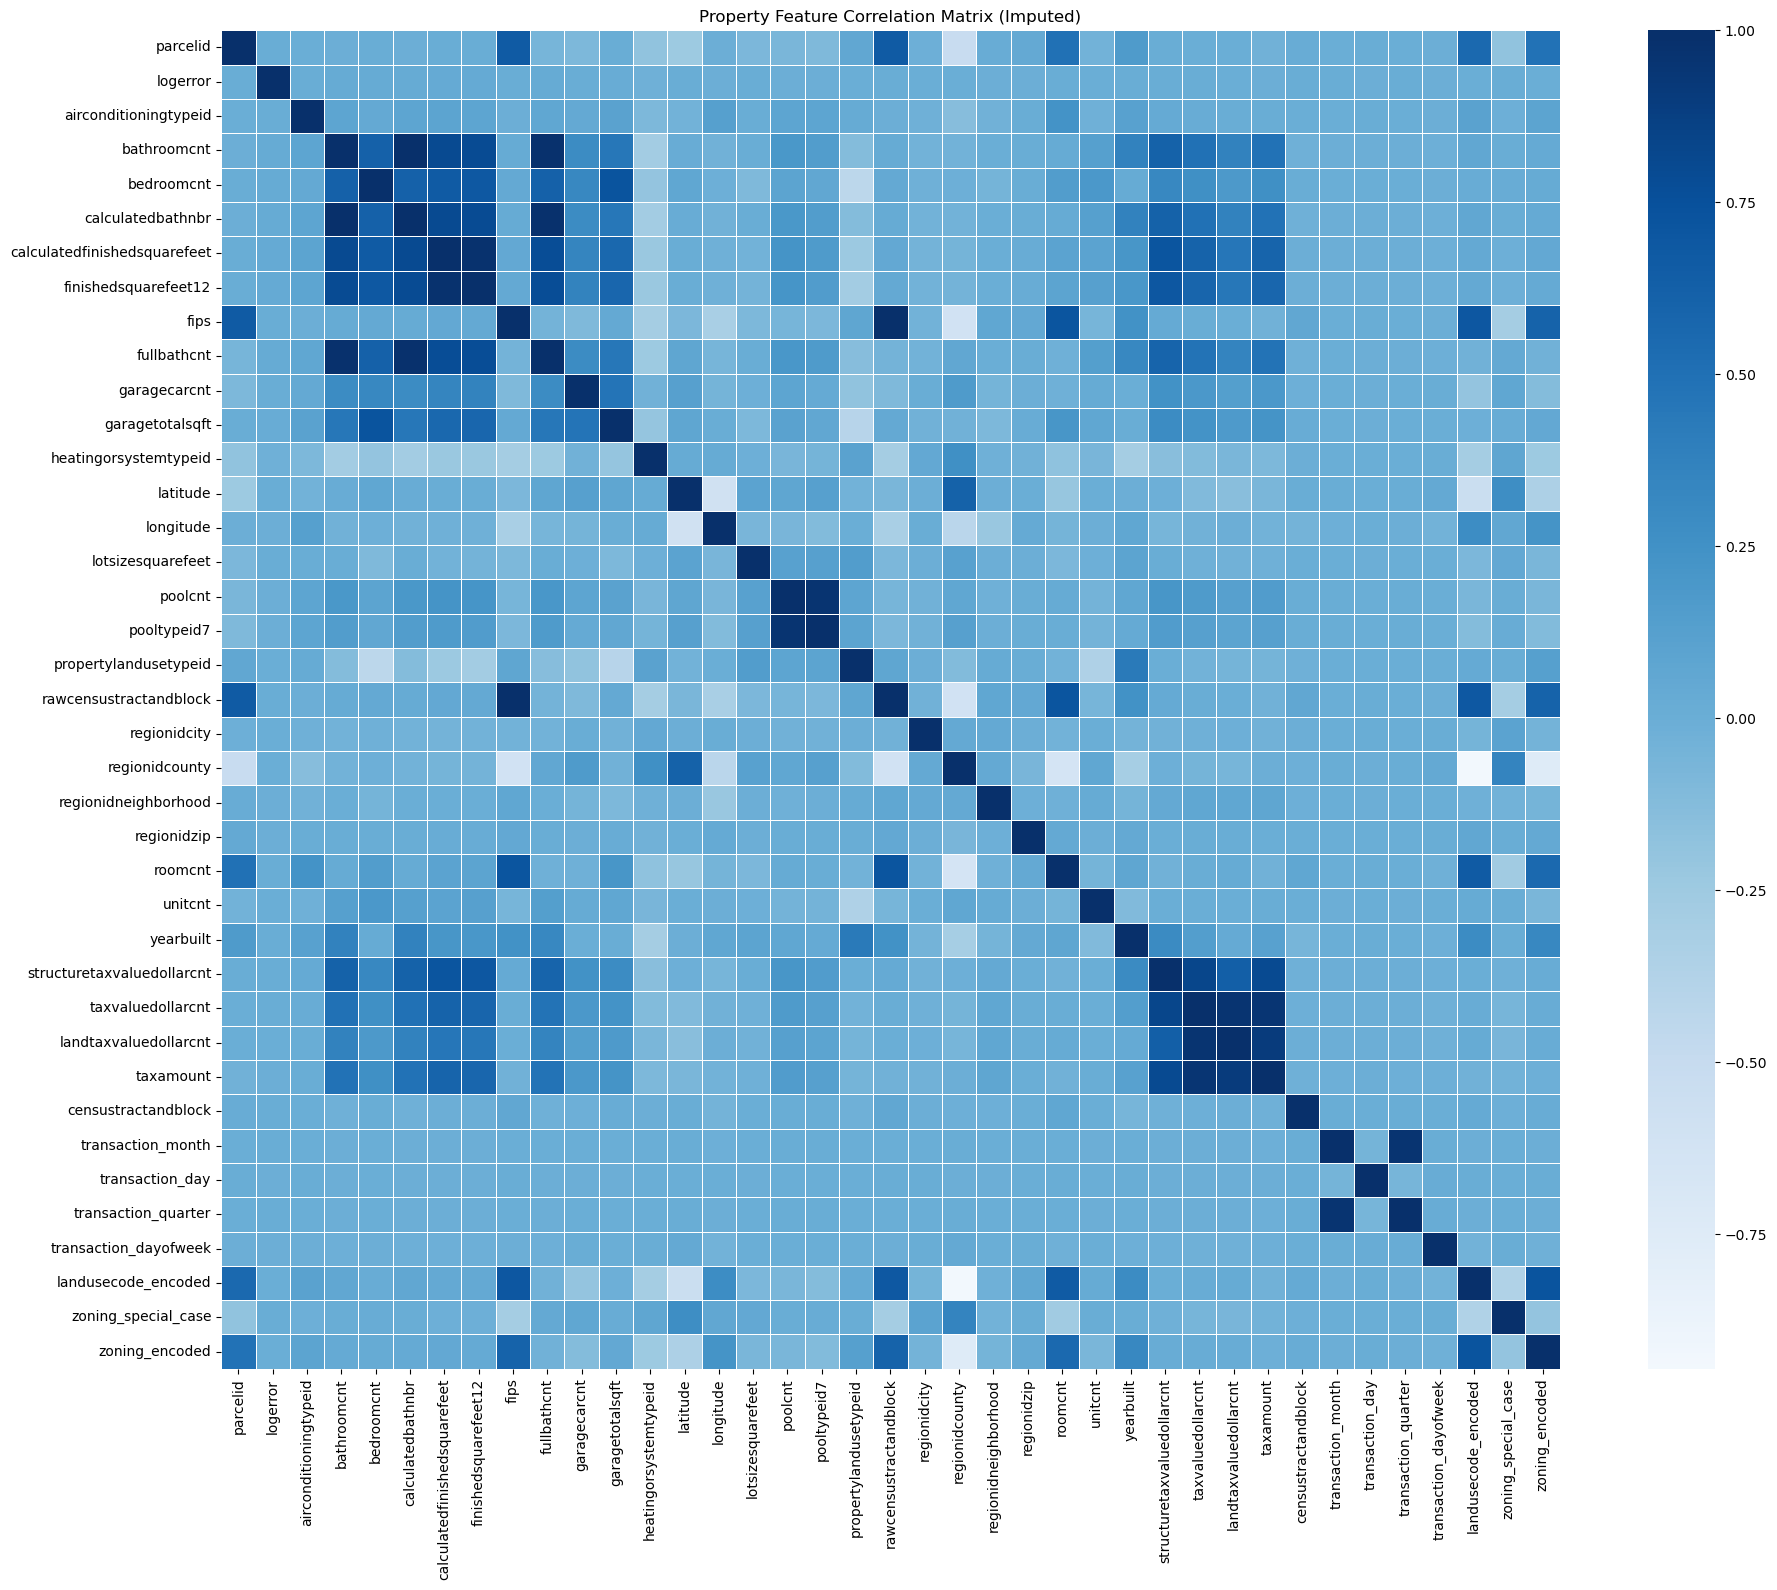

In [ ]:
df_filled = pd.read_csv("imputed.csv")

# correlation matrix
corr = df_filled.corr()

# plot heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(corr, annot=False, cmap='Blues', center=0, square=True, linewidths=0.5)
plt.title('Property Feature Correlation Matrix (Imputed)')
plt.tight_layout()
plt.show()

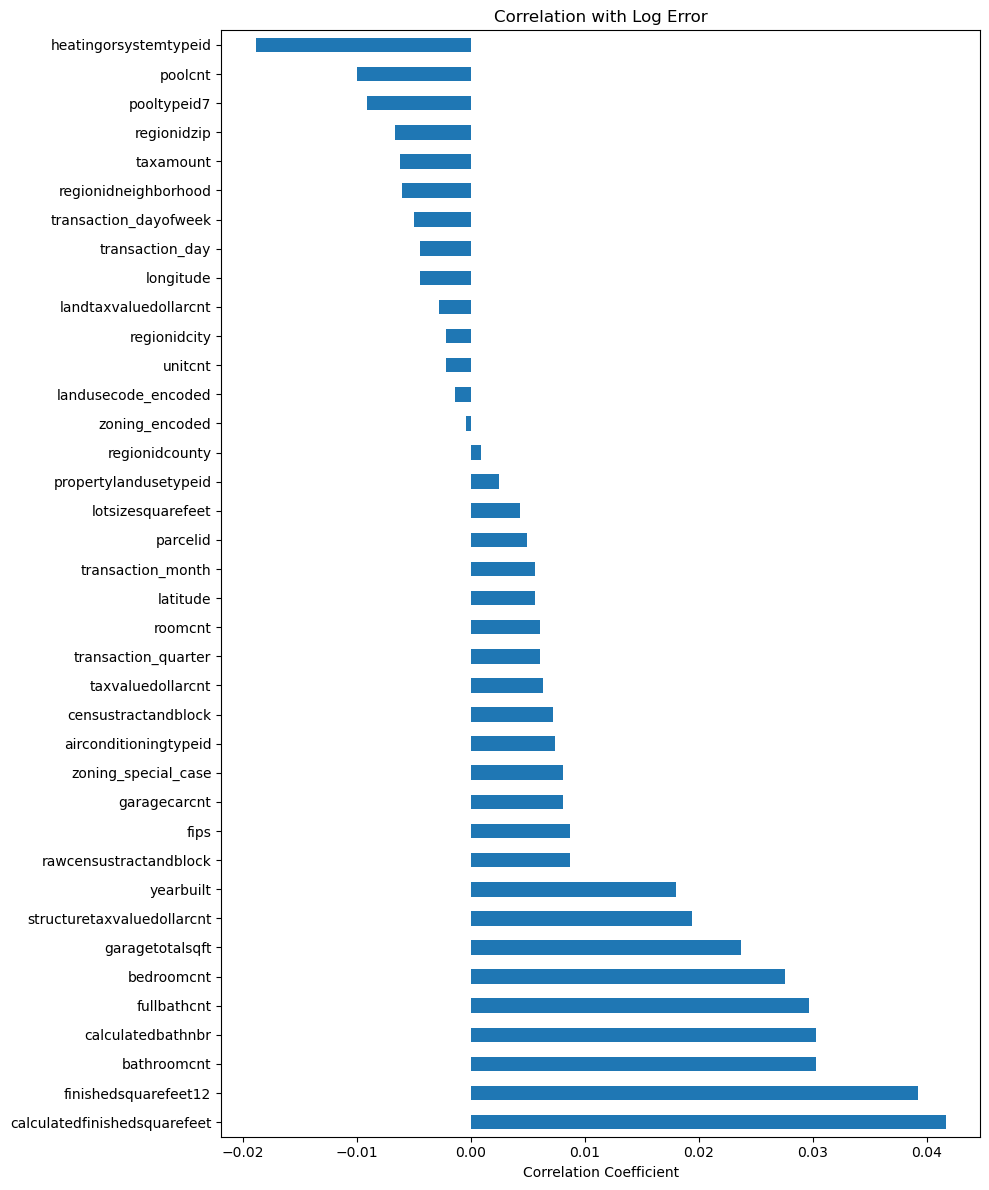

Top 10 positive correlations with logerror:
calculatedfinishedsquarefeet    0.041642
finishedsquarefeet12            0.039224
bathroomcnt                     0.030256
calculatedbathnbr               0.030256
fullbathcnt                     0.029697
bedroomcnt                      0.027535
garagetotalsqft                 0.023674
structuretaxvaluedollarcnt      0.019394
yearbuilt                       0.017955
rawcensustractandblock          0.008723
Name: logerror, dtype: float64

Top 10 negative correlations with logerror:
landtaxvaluedollarcnt   -0.002846
longitude               -0.004483
transaction_day         -0.004528
transaction_dayofweek   -0.004995
regionidneighborhood    -0.006077
taxamount               -0.006203
regionidzip             -0.006712
pooltypeid7             -0.009112
poolcnt                 -0.010025
heatingorsystemtypeid   -0.018906
Name: logerror, dtype: float64


In [ ]:
# plot correlations with target variable (logerror)
plt.figure(figsize=(10, 12))
target_corr = corr['logerror'].sort_values(ascending=False)

# exclude logerror's correlation with itself
target_corr = target_corr.drop('logerror')

target_corr.plot(kind='barh')
plt.title('Correlation with Log Error')
plt.xlabel('Correlation Coefficient')
plt.tight_layout()
plt.show()

# print highest positive and negative correlations with logerror
print("Top 10 positive correlations with logerror:")
print(target_corr.head(10))
print("\nTop 10 negative correlations with logerror:")
print(target_corr.tail(10))